In [0]:
import os
import zipfile
import random
import numpy as np

In [0]:
!wget --no-check-certificate \
    "https://storage.googleapis.com/datsets/DRIVE.zip"\
    -O "/tmp/DRIVE.zip"

local_zip = '/tmp/DRIVE.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


--2020-04-10 15:20:51--  https://storage.googleapis.com/datsets/DRIVE.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.128, 2607:f8b0:400c:c12::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29756930 (28M) [application/x-zip-compressed]
Saving to: ‘/tmp/DRIVE.zip’

/tmp/DRIVE.zip      100%[===================>]  28.38M   110MB/s    in 0.3s    

2020-04-10 15:20:51 (110 MB/s) - ‘/tmp/DRIVE.zip’ saved [29756930/29756930]



In [0]:
import subprocess,sys
!wget --no-check-certificate \
    "https://storage.googleapis.com/datsets/model1/21%20by%2021/patches21n21nskip2.zip"\
    -O "/tmp/patches.zip"

zipFile = '/tmp/patches.zip'
destinationDirectory='/tmp'
subprocess.Popen(["7z", "e", f"{zipFile}", f"-o{destinationDirectory}", "-y"])
# zip_ref   = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/tmp')
# zip_ref.close()


--2020-04-10 15:20:58--  https://storage.googleapis.com/datsets/model1/21%20by%2021/patches21n21nskip2.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.128, 2607:f8b0:400c:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180418706 (172M) [application/x-zip-compressed]
Saving to: ‘/tmp/patches.zip’

/tmp/patches.zip    100%[===================>] 172.06M   121MB/s    in 1.4s    

2020-04-10 15:21:00 (121 MB/s) - ‘/tmp/patches.zip’ saved [180418706/180418706]



In [0]:
X = np.load('/tmp/patches21n21nskip2.npy')

In [0]:
X.shape

(1652720, 21, 21, 3)

In [0]:
y=np.load('/content/outputs.npy')
w=y//255
z=set(w)
y=w
y.shape

(1652720,)

In [0]:
X_train,X_val,y_train,y_val=X[0:1500000,:,:],X[1500000:1652720,:,:],y[0:1500000],y[1500000:1652720]

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3, 3), activation='relu', input_shape=(21,21,3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit(X_train,y_train,batch_size=64,epochs=10,validation_data=(X_val,y_val))
model.save('model21by21.hdf5')

Epoch 1/10
23438/23438 [==============================] - 71s 3ms/step - loss: 0.1626 - accuracy: 0.9536 - val_loss: 0.1052 - val_accuracy: 0.9610
Epoch 2/10
23438/23438 [==============================] - 70s 3ms/step - loss: 0.1218 - accuracy: 0.9571 - val_loss: 0.2118 - val_accuracy: 0.9381
Epoch 3/10
23438/23438 [==============================] - 69s 3ms/step - loss: 0.1287 - accuracy: 0.9555 - val_loss: 0.1006 - val_accuracy: 0.9624
Epoch 4/10
23438/23438 [==============================] - 68s 3ms/step - loss: 0.1365 - accuracy: 0.9531 - val_loss: 0.1149 - val_accuracy: 0.9591
Epoch 5/10
23438/23438 [==============================] - 69s 3ms/step - loss: 0.2466 - accuracy: 0.9532 - val_loss: 0.1277 - val_accuracy: 0.9570
Epoch 6/10
23438/23438 [==============================] - 69s 3ms/step - loss: 0.1345 - accuracy: 0.9536 - val_loss: 0.1168 - val_accuracy: 0.9583
Epoch 7/10
23438/23438 [==============================] - 69s 3ms/step - loss: 0.1283 - accuracy: 0.9554 - val_loss: 0

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 19, 19, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2592)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2655232   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 3,181,441
Trainable params: 3,181,441
Non-trainable params: 0
______________________________________________

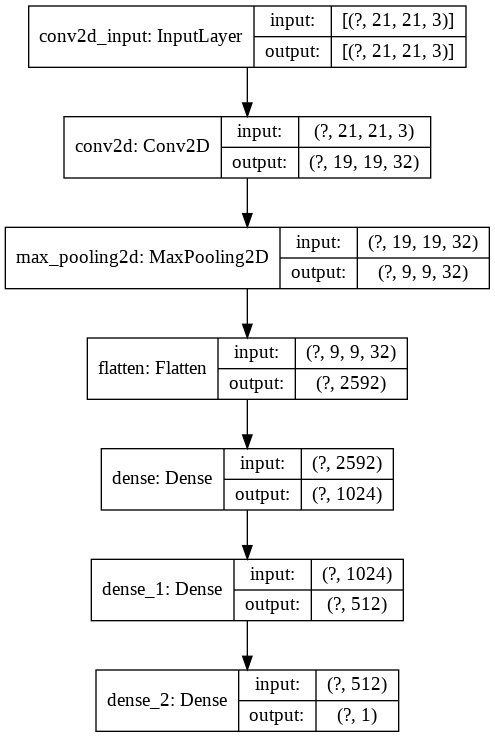

In [0]:
tf.keras.utils.plot_model(model, 'multi_input_and_output_model.png', show_shapes=True)

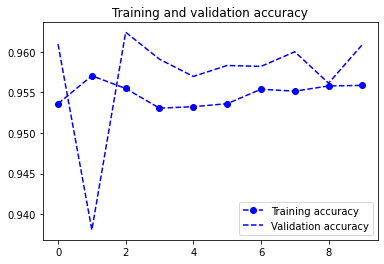

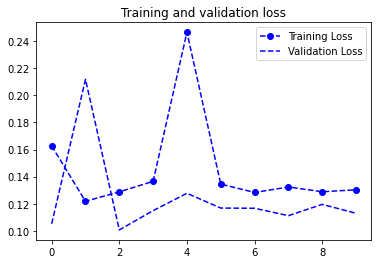

In [0]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy',linestyle='dashed')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy',linestyle='dashed')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss',linestyle='dashed')
plt.plot(epochs, val_loss, 'b', label='Validation Loss',linestyle='dashed')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
model.summary()

NameError: ignored

In [0]:
history

AttributeError: ignored

In [0]:
import pandas as pd
df = pd.DataFrame(history.history)

In [0]:
df

,loss,accuracy,val_loss,val_accuracy
0,0.162643,0.953616,0.105154,0.960955
1,0.121766,0.957059,0.211800,0.938057
2,0.128735,0.955489,0.100644,0.962421
3,0.136507,0.953061,0.114870,0.959095
4,0.246553,0.953247,0.127681,0.956974
5,0.134503,0.953613,0.116776,0.958322
6,0.128272,0.955395,0.116618,0.958211
7,0.132328,0.955158,0.111160,0.960012
8,0.128814,0.955802,0.119501,0.956149
9,0.130246,0.955871,0.112923,0.960909


In [0]:
df.to_excel('model1st21by21_history.xlsx')